In [1]:
import pandas as pd
import nltk
from libs.cleaning import *
from libs.preprocess import *
from matplotlib import pyplot as plt
import numpy as np
import os

import warnings
warnings.filterwarnings("ignore")

nltk_download()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rodri\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rodri\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\rodri\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


# Lectura

In [ ]:
DATA_PATH = "../data"
csv_names = ["/tweets_clean.csv","/tweets_neg_clean.csv","/tweets_pos_clean.csv"]
dfs = list(map(lambda x: pd.read_csv(DATA_PATH + x), csv_names))
tweets = pd.concat(dfs, ignore_index=True)
tweets.head()

,Tweet,sentiment
0,Según estudios recientes los matemáticos no me...,0
1,#angelysaras mantendrán para el juego que la b...,0
2,@Richard46763975 @Riscacumguy si voy &amp; reg...,0
3,Porque frente a su Piche y Petróleo tenemos un...,0
4,Clásicos que deberías leer aunque te digan que...,0


# Limpieza

In [3]:
tweets["RT"] = tweets["Tweet"].apply(lambda x: 1 if x.startswith("RT") else 0)
tweets.head()

,Tweet,sentiment,RT
0,Según estudios recientes los matemáticos no me...,0,0
1,#angelysaras mantendrán para el juego que la b...,0,0
2,@Richard46763975 @Riscacumguy si voy &amp; reg...,0,0
3,Porque frente a su Piche y Petróleo tenemos un...,0,0
4,Clásicos que deberías leer aunque te digan que...,0,0


In [4]:
tweets["Cleaned"] = limpieza_total(tweets["Tweet"])
tweets["Cleaned"] = tweets["Cleaned"].apply(lambda x: lemmatize_text(x))

In [5]:
tweets["len"] = tweets["Cleaned"].apply(lambda x: len(x.split()))

In [6]:
tweets[tweets["RT"]==0][tweets["Cleaned"]==""].shape

(2507, 5)

# Análisis

In [7]:
print("Total de tweets: {:,}".format(len(tweets)))
print("Total de RTs: {:,}".format(tweets["RT"].sum()))
print("Porcentaje de RTs: {:.2f}%".format(tweets["RT"].mean()*100))

Total de tweets: 165,000
Total de RTs: 250
Porcentaje de RTs: 0.15%


In [8]:
# Top 20 palabras más comunes
top_words = pd.Series(count_words(tweets.Cleaned.str.split())).sort_values(ascending=False)
top_words_nort = pd.Series(count_words(tweets[tweets.RT != 1].Cleaned.str.split())).sort_values(ascending=False)

top_words_per = top_words / top_words.sum()
top_words_nort_per = top_words_nort / top_words_nort.sum()

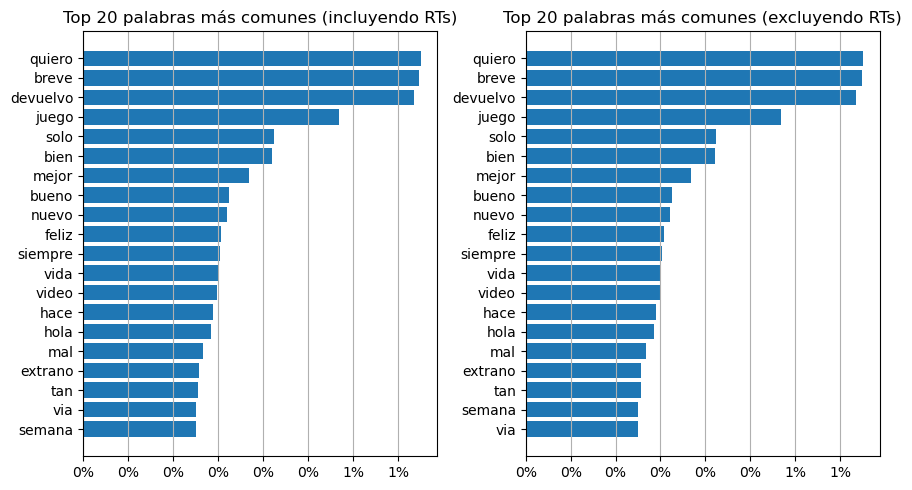

In [9]:
from matplotlib.ticker import FuncFormatter

# Función para formatear los valores como porcentaje
formatter = FuncFormatter(lambda x, pos: f'{x:.0%}')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 5))

axes[0].grid(axis='x')  # Añadir cuadrícula solo en el eje x
# Invertir el orden de las palabras y los valores en el eje y para la primera gráfica
axes[0].barh(top_words_per.index[:20], top_words_per.values[:20])
axes[0].set_title("Top 20 palabras más comunes (incluyendo RTs)")
axes[0].invert_yaxis()  # Voltear en espejo
axes[0].xaxis.set_major_formatter(formatter)  # Formatear eje x como porcentaje

axes[1].grid(axis='x')  # Añadir cuadrícula solo en el eje x
# Invertir el orden de las palabras y los valores en el eje y para la segunda gráfica
axes[1].barh(top_words_nort_per.index[:20][::-1], top_words_nort_per.values[:20][::-1])
axes[1].set_title("Top 20 palabras más comunes (excluyendo RTs)")
axes[1].xaxis.set_major_formatter(formatter)  # Formatear eje x como porcentaje

plt.tight_layout()
plt.show()

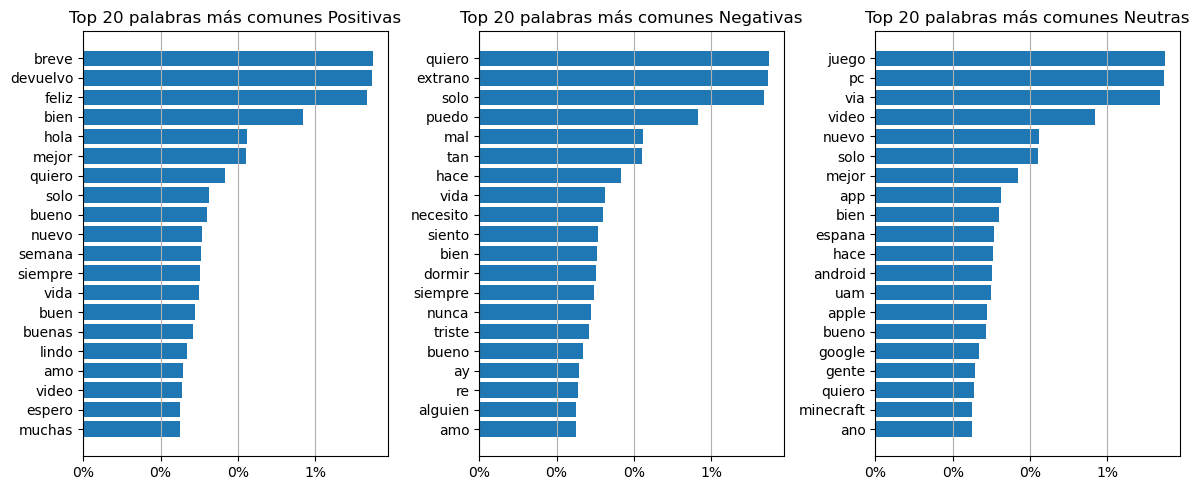

In [10]:
#Top 20 words en cada categoría
top_words_pos = pd.Series(count_words(tweets[tweets["sentiment"]==1].Cleaned.str.split())).sort_values(ascending=False)
top_words_neg = pd.Series(count_words(tweets[tweets["sentiment"]==-1].Cleaned.str.split())).sort_values(ascending=False)
top_words_neu = pd.Series(count_words(tweets[tweets["sentiment"]==0].Cleaned.str.split())).sort_values(ascending=False)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 5))

axes[0].grid(axis='x')  # Añadir cuadrícula solo en el eje x
# Invertir el orden de las palabras y los valores en el eje y para la primera gráfica
axes[0].barh(top_words_pos.index[:20], top_words_per.values[:20])
axes[0].set_title("Top 20 palabras más comunes Positivas")
axes[0].invert_yaxis()  # Voltear en espejo
axes[0].xaxis.set_major_formatter(formatter)  # Formatear eje x como porcentaje

axes[1].grid(axis='x')  # Añadir cuadrícula solo en el eje x
# Invertir el orden de las palabras y los valores en el eje y para la segunda gráfica
axes[1].barh(top_words_neg.index[:20][::-1], top_words_nort_per.values[:20][::-1])
axes[1].set_title("Top 20 palabras más comunes Negativas")
axes[1].xaxis.set_major_formatter(formatter)  # Formatear eje x como porcentaje

axes[2].grid(axis='x')  # Añadir cuadrícula solo en el eje x
# Invertir el orden de las palabras y los valores en el eje y para la segunda gráfica
axes[2].barh(top_words_neu.index[:20][::-1], top_words_nort_per.values[:20][::-1])
axes[2].set_title("Top 20 palabras más comunes Neutras")
axes[2].xaxis.set_major_formatter(formatter)  # Formatear eje x como porcentaje
plt.tight_layout()
plt.show()

In [11]:
tweets = tweets[tweets["RT"] == 0][tweets["Cleaned"]!=""][tweets["len"]>=3].sample(frac=0.25, random_state=42)

In [12]:
tweets["sentiment"].groupby(tweets["sentiment"]).count()

sentiment
-1     9326
 0    12007
 1     8847
Name: sentiment, dtype: int64

# Clustering

## Tokenize

In [13]:
tweets["Token"] = tweets.Cleaned.str.split()

## Train test split

In [14]:
#importamos train test split
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(tweets["Token"], tweets["sentiment"], test_size=0.2, random_state=42)

## Embeddings

In [16]:
from gensim.models import FastText
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer

In [28]:
# w2v = FastText(sentences=tweets.Token, vector_size=100, window=3, min_count=1, workers=-1)
w2v = Word2Vec(sentences=X_train, vector_size=50, window=3, min_count=1, workers=-1)
# w2v = TfidfVectorizer()
# emb = list(w2v.fit_transform(tweets.Cleaned).toarray())

In [29]:
tweets["Embedding"] = tweets.Token\
    .apply(lambda x: [w2v.wv[word] for word in x if word in w2v.wv.key_to_index])\
    .apply(lambda x: np.zeros(w2v.vector_size) if len(x) == 0 else np.mean(x, axis=0))
# tweets["Embedding"] = emb

In [30]:
X_train_emb = X_train\
    .apply(lambda x: [w2v.wv[word] for word in x if word in w2v.wv.key_to_index])\
    .apply(lambda x: np.zeros(w2v.vector_size) if len(x) == 0 else np.mean(x, axis=0))

X_test_emb = X_test\
    .apply(lambda x: [w2v.wv[word] for word in x if word in w2v.wv.key_to_index])\
    .apply(lambda x: np.zeros(w2v.vector_size) if len(x) == 0 else np.mean(x, axis=0))

In [31]:
#Numero de palabras aprendidas
len(w2v.wv.key_to_index)

31087

## T-SNE
(Para pre visualizar los datos)

In [20]:
from sklearn.manifold import TSNE

In [32]:
tsne = TSNE(n_components=2, random_state=42,
             n_iter=2000, perplexity=5, init='pca',
               metric='euclidean', n_jobs=-1)
X_train_emb = np.vstack(X_train_emb.to_numpy())
X_test_emb = np.vstack(X_test_emb.to_numpy())
tsne_cord = tsne.fit_transform(X_train_emb)

## Pre visualización

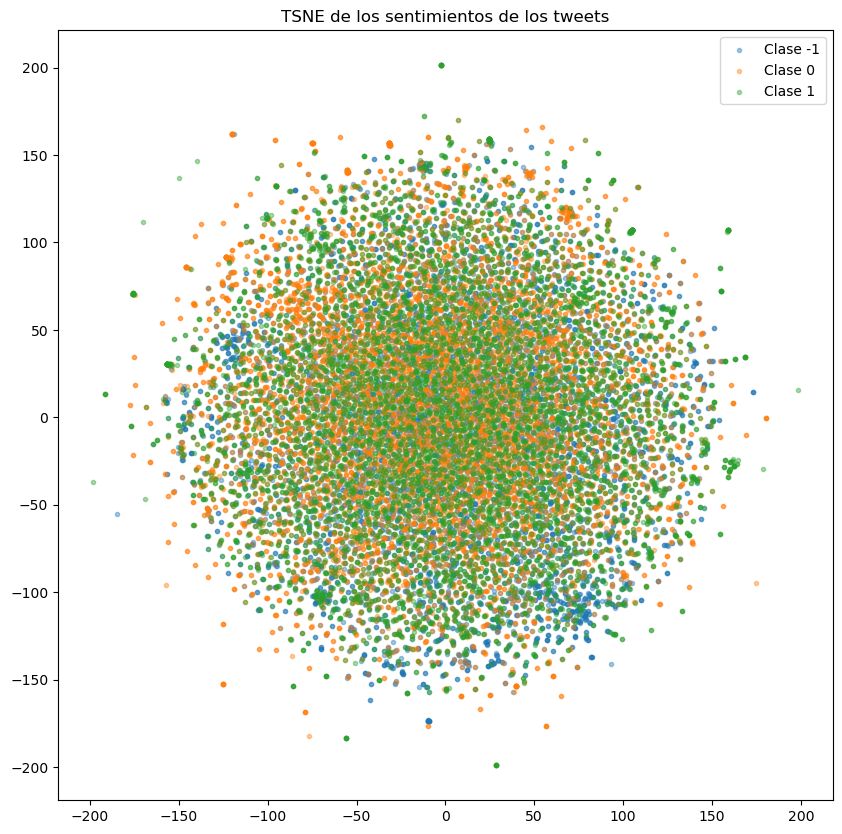

In [33]:
def plot_tsne(tweets):
    pre_vis = np.vstack(tsne_cord)
    fig = plt.figure(figsize=(10, 10))
    for clase in np.unique(y_train):
        indices = np.where(y_train == clase)
        plt.scatter(tsne_cord[indices, 0], tsne_cord[indices, 1],
                     label=f'Clase {clase}', marker='.', alpha=0.4)
    plt.title("TSNE de los sentimientos de los tweets")
    # plt.xlim(-15, 15)
    # plt.ylim(-15, 15)
    plt.legend()
    plt.show()

plot_tsne(tweets)

# Clasificador

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report

from sklearn.model_selection import GridSearchCV

In [23]:
lr = LogisticRegression()
rf = RandomForestClassifier()
svc = SVC()

# Logistic regresion

In [24]:
#Logistic Regression
param_lr = {
    'C': [0.1, 1, 10],
    'max_iter': [100, 200, 300],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}
GS_lr = GridSearchCV(lr, param_lr, cv=5, n_jobs=-1)
GS_lr.fit(X_train_emb, y_train)
print(GS_lr.best_params_)
y_pred = GS_lr.predict(X_test_emb)
print(classification_report(y_test, y_pred))

{'C': 10, 'max_iter': 100, 'solver': 'lbfgs'}
              precision    recall  f1-score   support

          -1       0.52      0.19      0.28      1974
           0       0.45      0.79      0.57      2460
           1       0.48      0.35      0.40      1991

    accuracy                           0.47      6425
   macro avg       0.48      0.44      0.42      6425
weighted avg       0.48      0.47      0.43      6425



# Random Forest

In [26]:
#Random Forest
param_rf = {
    'n_estimators': [50,100, 150],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
GS_rf = GridSearchCV(rf, param_rf, cv=5, n_jobs=-1)
GS_rf.fit(X_train_emb, y_train)
print(GS_rf.best_params_)
y_pred = GS_rf.predict(X_test_emb)
print(classification_report(y_test, y_pred))

{'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 150}
              precision    recall  f1-score   support

          -1       0.49      0.46      0.47      1974
           0       0.51      0.70      0.59      2460
           1       0.61      0.36      0.45      1991

    accuracy                           0.52      6425
   macro avg       0.54      0.51      0.51      6425
weighted avg       0.54      0.52      0.51      6425



# SVC

In [ ]:
#SVC
param_svc = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [3, 4, 5],
    'gamma': ['scale', 'auto']
}
GS_svc = GridSearchCV(svc, param_svc, cv=5, n_jobs=-1)
GS_svc.fit(X_train_emb, y_train)
print(GS_svc.best_params_)
y_pred = GS_svc.predict(X_test_emb)
print(classification_report(y_test, y_pred))